In [95]:
import pandas as pd

In [96]:
df = pd.read_csv("../data/fromAPI/cleaned_hourly_all.csv")

In [97]:
date_format = "%Y-%m-%d %H:%M:%S"
df["arrival_plan"] = pd.to_datetime(df["arrival_plan"], format=date_format)
df["departure_plan"] = pd.to_datetime(df["departure_plan"], format=date_format)
df["arrival_change"] = pd.to_datetime(df["arrival_change"], format=date_format)
df["departure_change"] = pd.to_datetime(df["departure_change"], format=date_format)
df["arrival_plan_hour"] = df["arrival_plan"].dt.hour


In [98]:
df.dropna(subset=["arrival_plan"], inplace=True)

In [99]:
# Set index to datetime
df.set_index('arrival_plan', inplace=True)



In [100]:
# Select only numeric columns for resampling
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Resample to hourly data and calculate the mean
hourly_data = numeric_cols.resample('h').mean()

In [101]:
hourly_data.head(30)

,eva_nr,category,zip,long,lat,arrival_delay_m,departure_delay_m,arrival_plan_hour
arrival_plan,,,,,,,,
2024-06-23 12:00:00,8.008979e+06,3.692641,54107.393939,9.982328,50.513574,1.987013,1.588745,12.0
2024-06-23 13:00:00,8.019565e+06,3.978005,45577.775400,10.249905,50.925245,0.874461,0.918958,13.0
2024-06-23 14:00:00,8.019557e+06,3.976506,45426.060413,10.244662,50.942044,0.893187,0.922974,14.0
2024-06-23 15:00:00,8.019649e+06,3.976667,45313.820228,10.259809,50.948641,0.892469,0.925434,15.0
2024-06-23 16:00:00,8.019656e+06,3.979101,45336.707663,10.254186,50.942262,1.003400,1.031183,16.0
2024-06-23 17:00:00,8.019508e+06,3.975724,45351.145411,10.261168,50.935233,1.102190,1.128024,17.0
2024-06-23 18:00:00,8.019519e+06,3.973013,45470.274301,10.257169,50.928484,1.181855,1.207284,18.0
2024-06-23 19:00:00,8.019712e+06,3.971374,45572.548307,10.249039,50.922702,1.178996,1.208039,19.0
2024-06-23 20:00:00,8.019711e+06,3.971902,45477.200273,10.242474,50.921536,1.420702,1.433854,20.0


In [102]:
from datetime import datetime

In [103]:
hourly_data.iloc[28,5] = hourly_data[hourly_data["arrival_plan_hour"] == 15].arrival_delay_m.median()
hourly_data.iloc[29,5] = hourly_data[hourly_data["arrival_plan_hour"] == 16].arrival_delay_m.median()
hourly_data.iloc[30,5] = hourly_data[hourly_data["arrival_plan_hour"] == 17].arrival_delay_m.median()

In [104]:
tsa = hourly_data[["arrival_delay_m"]]

In [105]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

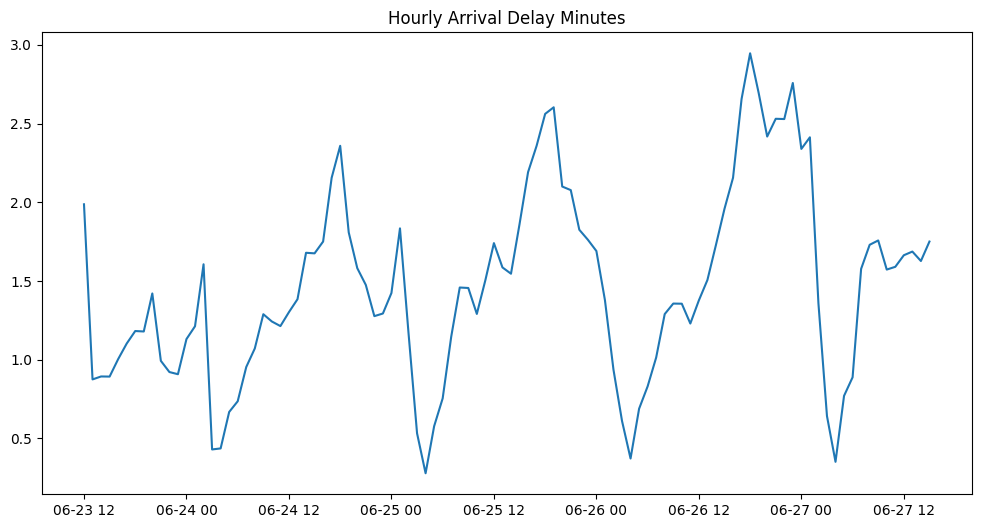

In [106]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(tsa['arrival_delay_m'])
plt.title('Hourly Arrival Delay Minutes')
plt.show()

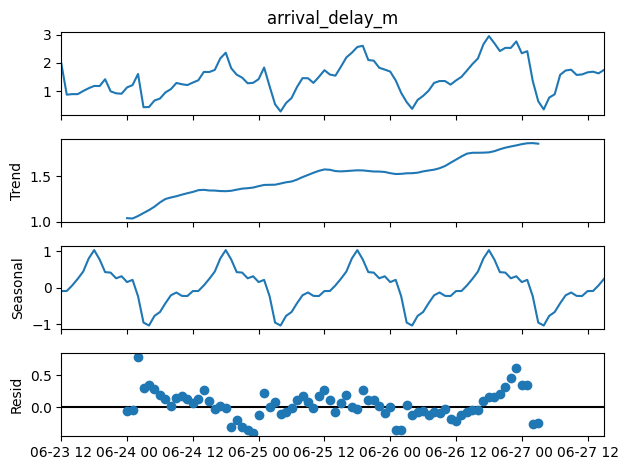

In [107]:
decomposition = seasonal_decompose(hourly_data['arrival_delay_m'], model='additive')
decomposition.plot()
plt.show()

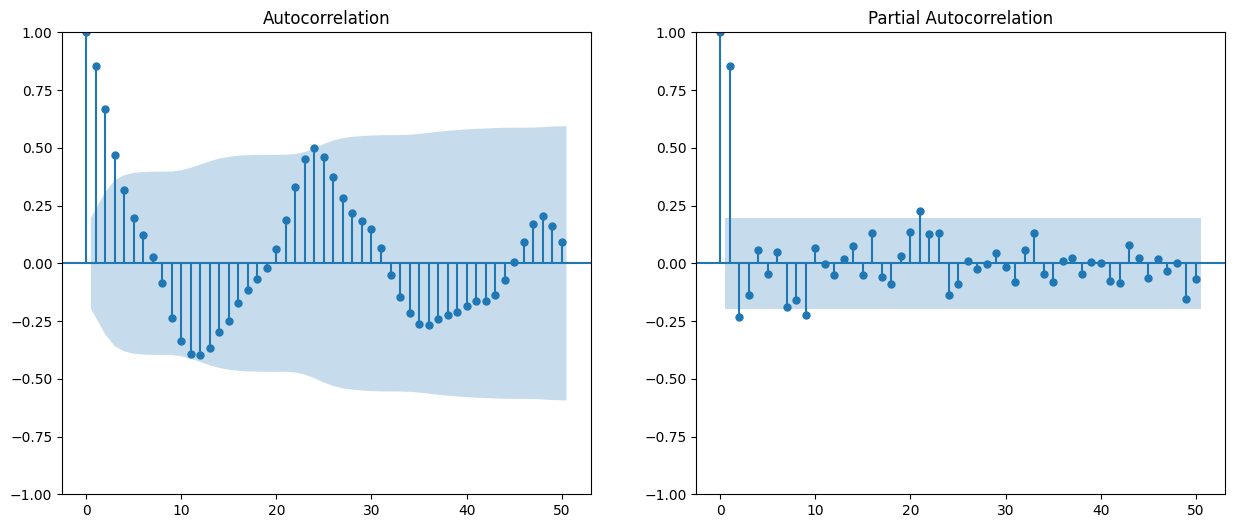

In [111]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
plot_acf(tsa['arrival_delay_m'], lags=50, ax=axes[0])
plot_pacf(tsa['arrival_delay_m'], lags=50, ax=axes[1])
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
model = SARIMAX(tsa['arrival_delay_m'], 
                order=(1, 1, 1), #CHANGE
                seasonal_order=(1, 1, 1, 24))#CHANGE
model_fit = model.fit(disp=False)
print(model_fit.summary())

In [ ]:
# Diagnostic plots
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
# Forecasting the next 24 hours
forecast_steps = 24
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='H')[1:]
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
confidence_intervals = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['arrival_delay_minutes'], label='Historical')
plt.plot(forecast_series, label='Forecast')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Delay (minutes)')
plt.legend()
plt.show()